In [1]:

import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt # for data visualization purposes
%matplotlib inline
import seaborn as sns # for statistical data visualization
import os
import warnings
warnings.filterwarnings('ignore')
from print_utils import Printer

# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,roc_auc_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from linear_regression import MyLinearRegression,computecost, gradientdescent, metrics
from split_dataset import train_test_split as my_test_train_split
from split_dataset import print_split_dataset
from error_metrics import error_metrics
from collections import Counter

def check_missing_values(df,columns):
    return True if df[columns].isnull().all().sum()>0 else False


In [18]:
data = pd.read_csv("datasets/Fifa_23_Players_Data.csv")
print(data.columns)

data["Best Position"].unique()

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [8]:
def pre_processing(data):

    """ partioning data into features and target """

    df = data[['Attacking Work Rate','Defensive Work Rate','Pace Total', 'Shooting Total', 'Passing Total',
        'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
        'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
        'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
        'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
        'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
        'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
        'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
        'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating',
        'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating',
        'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating',
        'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating',
        'GK Rating','Overall','Best Position']]

    merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}
    df = df.replace({'Best Position': merge_pos})

    # mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,'RM': 8, 'RB': 9}
    # df = df.replace({'Best Position': mapping})

    # get categorical columns
    categorical = [var for var in df.columns if df[var].dtype=='O']
    print('There are {} categorical variables.'.format(len(categorical)))
    print('The categorical variables are :', categorical)
    # display(df[categorical].head())

    # get numerical columns
    numerical = [var for var in df.columns if df[var].dtype!='O']
    print('There are {} numerical variables.'.format(len(numerical)))
    print('The numerical variables are :', numerical)
    # display(df[numerical].head())

    # check for missing values of categorical and numerical columns
    assert check_missing_values(df,categorical) == False
    assert check_missing_values(df,numerical) == False

    # # label encoder for categorical columns
    # le = LabelEncoder()
    # df[categorical] = df[categorical].apply(lambda col: le.fit_transform(col))

    # X = df.drop([df.columns[-1]], axis = 1)
    # y = df[df.columns[-1]]

    return df

df = pre_processing(data)

df.head()

There are 3 categorical variables.
The categorical variables are : ['Attacking Work Rate', 'Defensive Work Rate', 'Best Position']
There are 58 numerical variables.
The numerical variables are : ['Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB

,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Overall,Best Position
0,Low,Low,81,89,90,94,34,64,84,90,...,91,67,66,67,62,53,62,22,91,CM
1,Medium,Medium,80,88,83,87,39,78,75,92,...,89,67,67,67,63,58,63,21,91,CF
2,High,Medium,75,91,79,86,44,83,71,94,...,86,67,69,67,64,63,64,22,91,CF
3,High,High,74,88,93,87,64,77,94,85,...,91,82,82,82,78,72,78,24,91,CM
4,High,Low,97,89,80,92,36,76,78,93,...,92,70,66,70,66,57,66,21,91,CF


In [19]:
print("The percentage of the null values is: \n", (df.isnull().sum()/df.shape[0])*100, "%")

The percentage of the null values is: 
 Attacking Work Rate    0.0
Defensive Work Rate    0.0
Pace Total             0.0
Shooting Total         0.0
Passing Total          0.0
                      ... 
CB Rating              0.0
RB Rating              0.0
GK Rating              0.0
Overall                0.0
Best Position          0.0
Length: 61, dtype: float64 %


<Axes: xlabel='Best Position', ylabel='count'>

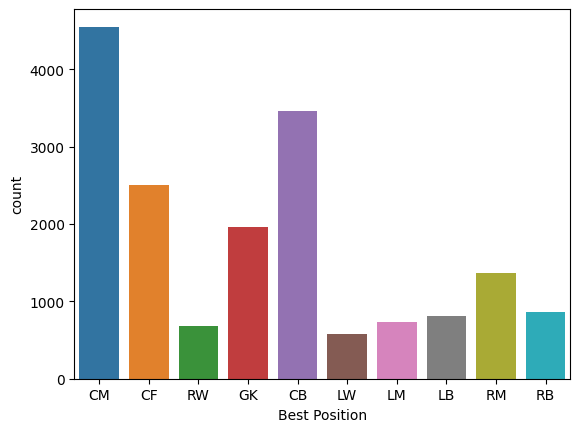

In [11]:
sns.countplot(x="Best Position", data = df)

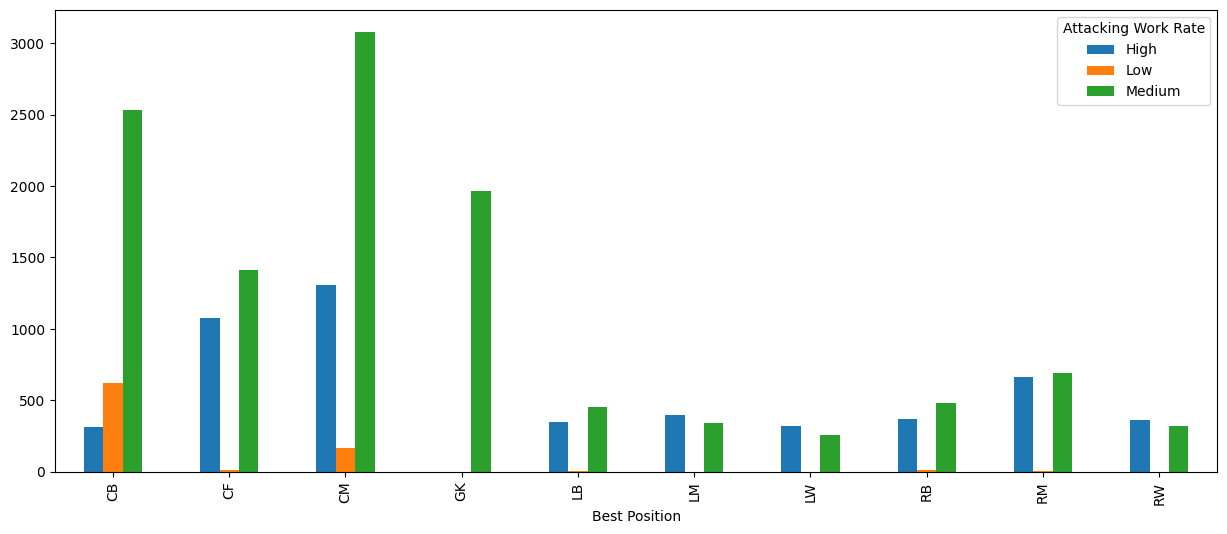

In [14]:
pd.crosstab(df["Best Position"],df["Attacking Work Rate"]).plot(kind="bar",figsize=(15,6))
plt.show()

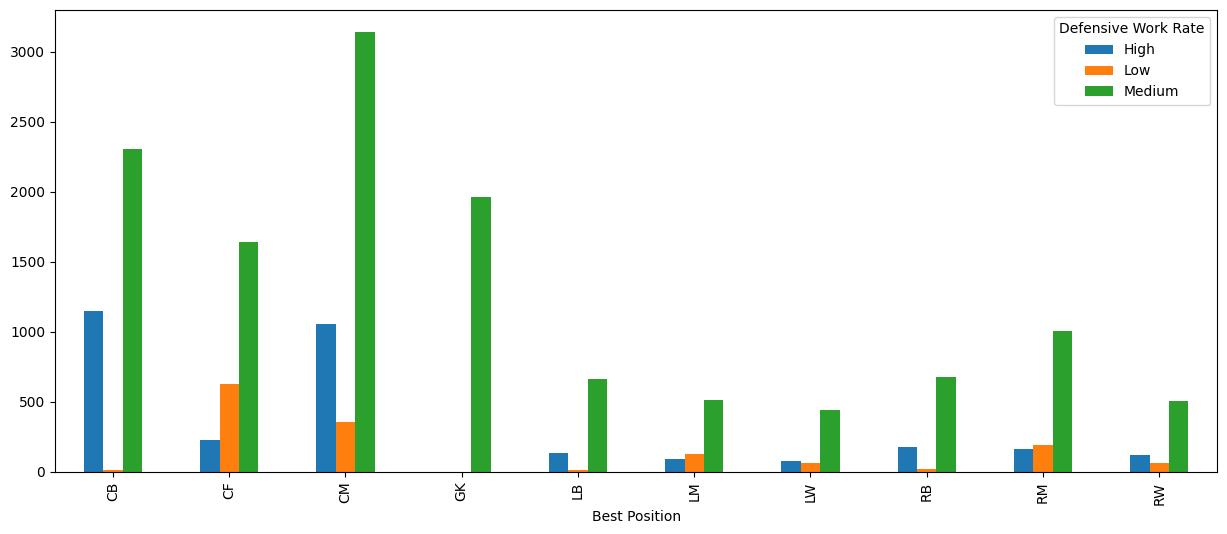

In [15]:
pd.crosstab(df["Best Position"],df["Defensive Work Rate"]).plot(kind="bar",figsize=(15,6))
plt.show()

# Logistic Regression

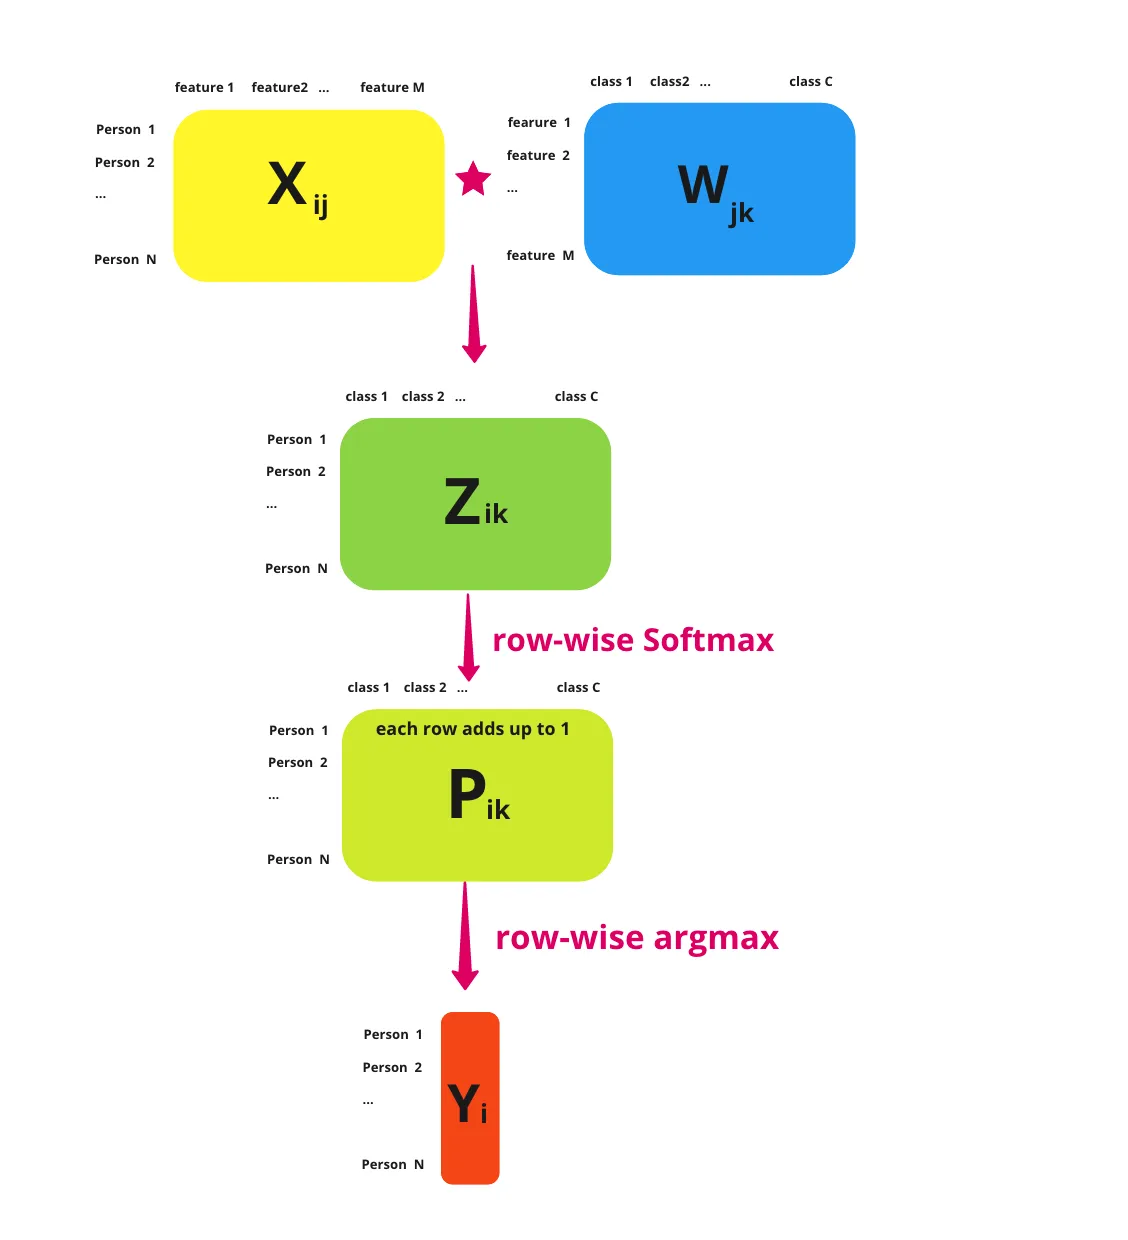

Multiclass logistic regression forward path when only one observation is looked at a time:

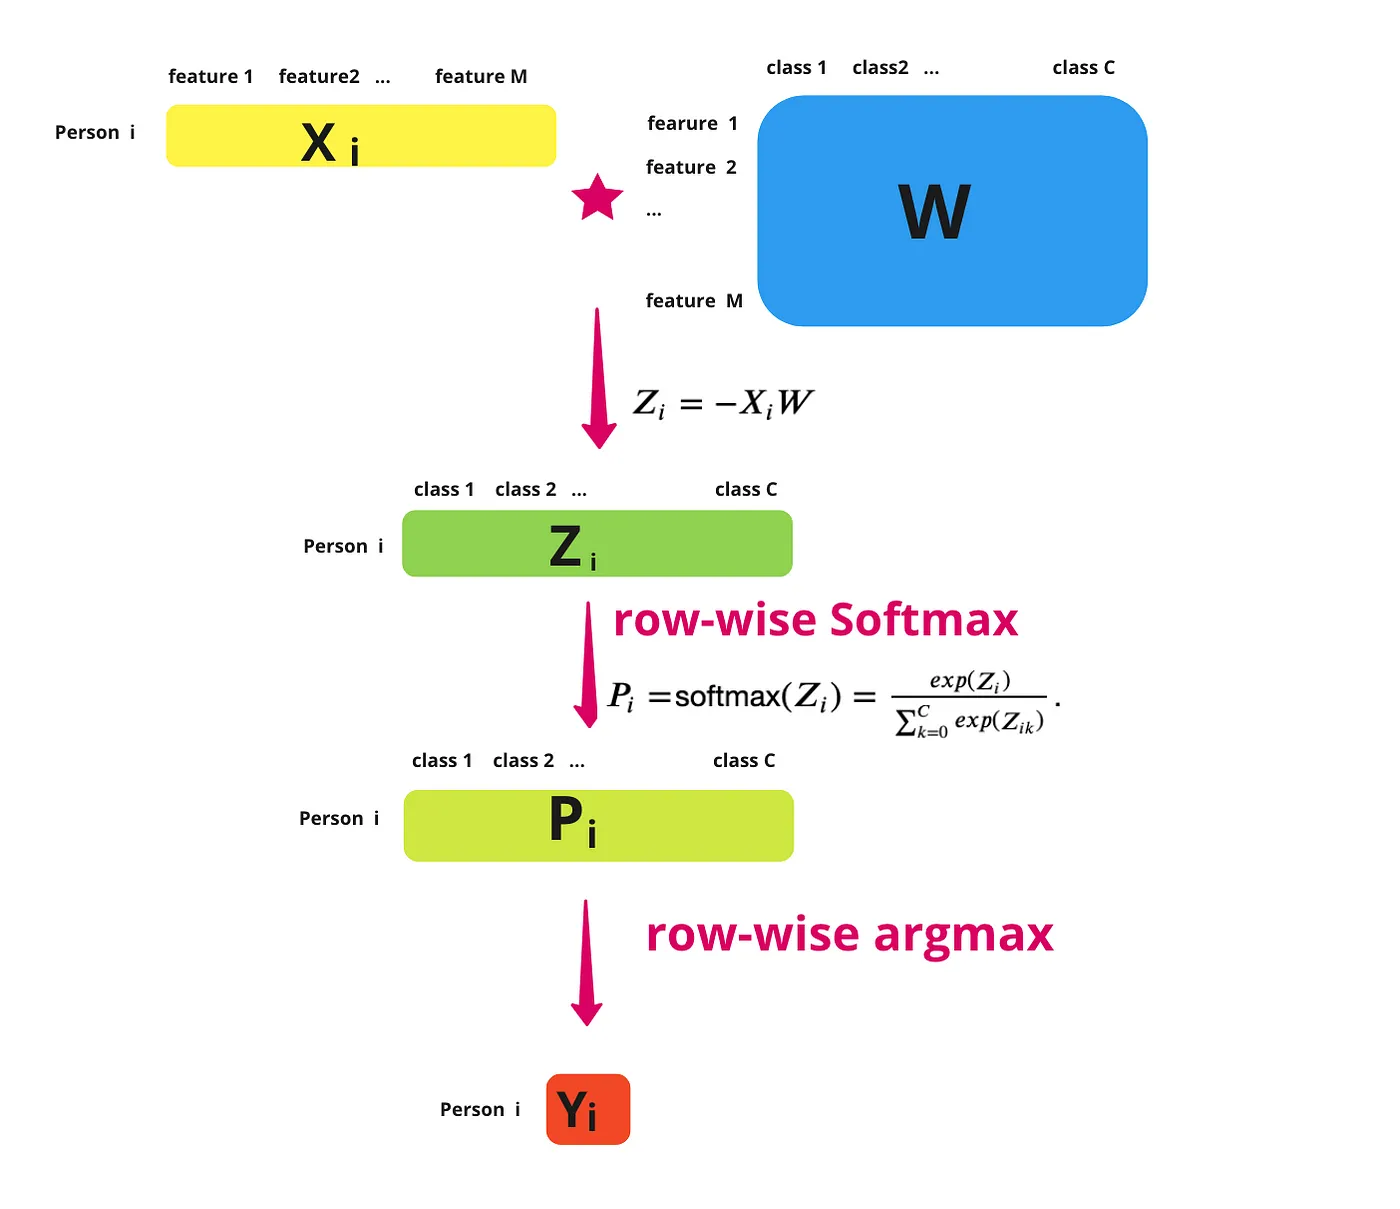

# Flowchart of Logistic Regression Image

[Source](https://pub.towardsai.net/linear-models-for-classification-logistic-regression-with-without-sklearn-library-6ec9a5556023)

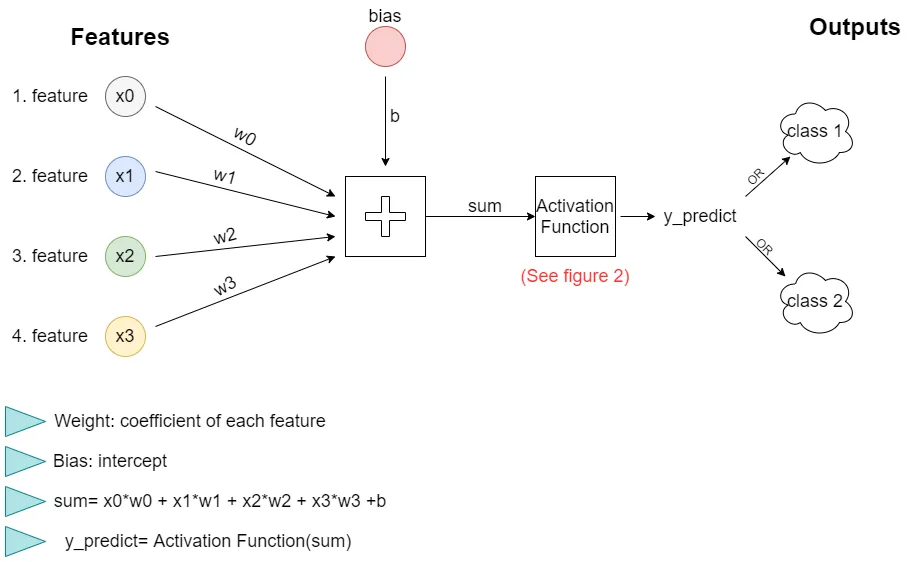

In [65]:
X = df.drop(["Best Position"], axis = 1)
Y = pd.DataFrame(df["Best Position"])
X_Train, X_Test, Y_Train, Y_Test = sk_train_test_split(X, Y, test_size=0.20, random_state=42)


# sns.countplot(x="Best Position", data = Y_Train)

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

Printer.red("LogisticRegression")
logistic_regression = LogisticRegression()
logistic_regression.fit(X_Train , Y_Train)
print(logistic_regression.score(X_Train, Y_Train))
print(logistic_regression.score(X_Test, Y_Test))
Y_Pred = logistic_regression.predict(X_Test)
Y_Proba = logistic_regression.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)

Printer.red("GaussianNB")
naive_bayes = GaussianNB()
naive_bayes.fit(X_Train , Y_Train)
print(naive_bayes.score(X_Train, Y_Train))
print(naive_bayes.score(X_Test, Y_Test))
Y_Pred = naive_bayes.predict(X_Test)
Y_Proba = naive_bayes.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)

Printer.red("RandomForestClassifier")
random_forest = RandomForestClassifier(criterion='gini',n_estimators=50)
random_forest.fit(X_Train , Y_Train)
print(random_forest.score(X_Train, Y_Train))
print(random_forest.score(X_Test, Y_Test))
Y_Pred = random_forest.predict(X_Test)
Y_Proba = random_forest.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)

Printer.red("DecisionTreeClassifier")
decision_tree = DecisionTreeClassifier(max_features = 39,max_depth = 10)
decision_tree.fit(X_Train , Y_Train)
print(decision_tree.score(X_Train, Y_Train))
print(decision_tree.score(X_Test, Y_Test))
Y_Pred = decision_tree.predict(X_Test)
Y_Proba = decision_tree.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)

Printer.red("AdaBoostClassifier")
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_Train , Y_Train)
print(ada_boost.score(X_Train, Y_Train))
print(ada_boost.score(X_Test, Y_Test))
Y_Pred = ada_boost.predict(X_Test)
Y_Proba = ada_boost.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)

Printer.red("KNeighborsClassifier")
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_Train , Y_Train)
print(knn.score(X_Train, Y_Train))
print(knn.score(X_Test, Y_Test))
Y_Pred = knn.predict(X_Test)
Y_Proba = knn.predict_proba(X_Test)
auc_score = roc_auc_score(Y_Test, Y_Proba, multi_class = 'ovr', average = 'macro')
Printer.green(auc_score)


 LogisticRegression
0.7668829779647721
0.7889332572732458
 0.9521277262355049
 GaussianNB
0.6149896598445411
0.634626354820308
 0.8793198105143208
 RandomForestClassifier
0.9999286885830422
0.7664004563605248
 0.9408066656939582
 DecisionTreeClassifier
0.7583969193467874
0.710781517398745
 0.8810622753273897
 AdaBoostClassifier
0.6051486843043571
0.6197946377638335
 0.7523319782006885
 KNeighborsClassifier
0.7661698637951936
0.7290359383913292
 0.8704864656921517


In [ ]:

top = df.sort_values(by=["Overall"], ascending=False).head(20)
top_pos = top["Best Position"]
top = top.drop(["Best Position"], axis = 1)
top = mms.fit_transform(top)
top = pd.DataFrame(top)

mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,'RM': 8, 'RB': 9}
for i in range(top.shape[0]):
    pred_pos = logistic_regression.predict(top.iloc[[i]])[0]
    pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
    true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]
    print('Prediction: {}\n True Best Pos: {}\n'.format(pred, true_pos))